In [62]:
import numpy as np
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import itertools
from functools import *

In [54]:
f = open("Day14_test.txt")
f = open("Day14.txt")
dat = []

for line in f.readlines(): 
    dat.append(line.strip())
#dat = dat[0]
#dat = np.array(dat,dtype=int)
# dat = np.array(dat)
# xmax = dat.shape[0]
# ymax = dat.shape[1]
# print(xmax,ymax)

In [55]:
dat[:10]

['p=32,46 v=96,-70',
 'p=7,74 v=-14,-96',
 'p=34,94 v=17,-18',
 'p=41,3 v=67,78',
 'p=6,31 v=37,11',
 'p=66,47 v=-79,46',
 'p=22,12 v=-57,-18',
 'p=91,38 v=-46,46',
 'p=77,99 v=50,-76',
 'p=39,71 v=52,-75']

### Part 1

In [112]:
xlim = 101
ylim = 103

In [113]:
robots = np.zeros((len(dat),4))

for i,line in enumerate(dat):
    pos,vel = line.split()
    posx = pos.split(',')[0][2:]
    posy = pos.split(',')[1]
    velx = vel.split(',')[0][2:]
    vely = vel.split(',')[1]
    robots[i,:] = ([int(posx),int(posy),int(velx),int(vely)])
robots       

array([[ 32.,  46.,  96., -70.],
       [  7.,  74., -14., -96.],
       [ 34.,  94.,  17., -18.],
       ...,
       [ 24.,  42.,  -7., -85.],
       [ 12.,  48., -57.,  46.],
       [ 55.,  98., -18.,  36.]])

In [172]:
def step(robs):
    for l,rob in enumerate(robs):
        robs[l,0] = (rob[0] + rob[2])%xlim
        robs[l,1] = (rob[1] + rob[3])%ylim
    return robs

In [115]:
steps = 100
robots0 = robots.copy()

for i in range(steps):
    robots1 = step(robots0)
    robots0 = robots1
robots1

array([[ 37.,  50.,  96., -70.],
       [ 21.,  53., -14., -96.],
       [ 17.,  45.,  17., -18.],
       ...,
       [ 31.,  91.,  -7., -85.],
       [ 69.,  13., -57.,  46.],
       [ 73.,  93., -18.,  36.]])

In [116]:
quads = []
for robot in robots1:
    if robot[0]<int(0.5*(xlim-1)):
        if robot[1]<int(0.5*(ylim-1)):
            quads.append(1)
        elif robot[1]>int(0.5*(ylim-1)):
            quads.append(2)
    elif robot[0]>int(0.5*(xlim-1)):
        if robot[1]<int(0.5*(ylim-1)):
            quads.append(3)
        elif robot[1]>int(0.5*(ylim-1)):
            quads.append(4)
quads = np.array(quads)

tot = 1
for i in np.arange(1,5,1):
    ct = len(np.where(quads==i)[0])
    tot = tot*ct
print(tot)

229421808


### Part 2

 66%|█████████████████████████████████████████████████▉                          | 6576/10000 [00:13<00:07, 475.81it/s]


6576 steps


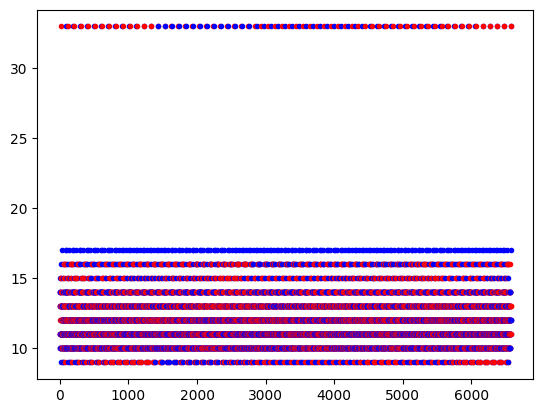

In [185]:
steps = 10000
robots0 = robots.copy()

for i in tqdm(range(steps)):
#while True:
    robots1 = step(robots0)
    robots0 = robots1

    vals,arrx,arry = np.histogram2d(robots1.T[0],robots1.T[1],bins=(xlim-1,xlim+1))
    xval_max = np.max(np.sum(vals,axis=0))
    yval_max = np.max(np.sum(vals,axis=1))
    
    plt.plot(i,xval_max,'b.')
    plt.plot(i,yval_max,'r.')
    
    if yval_max>32 and xval_max>32:
        print("%d steps"%i)
        break
# print(np.sum(robots1.T[1]==(ylim-1)))
# print(ylim-1)
# print(robots1.T[1])
plt.show()

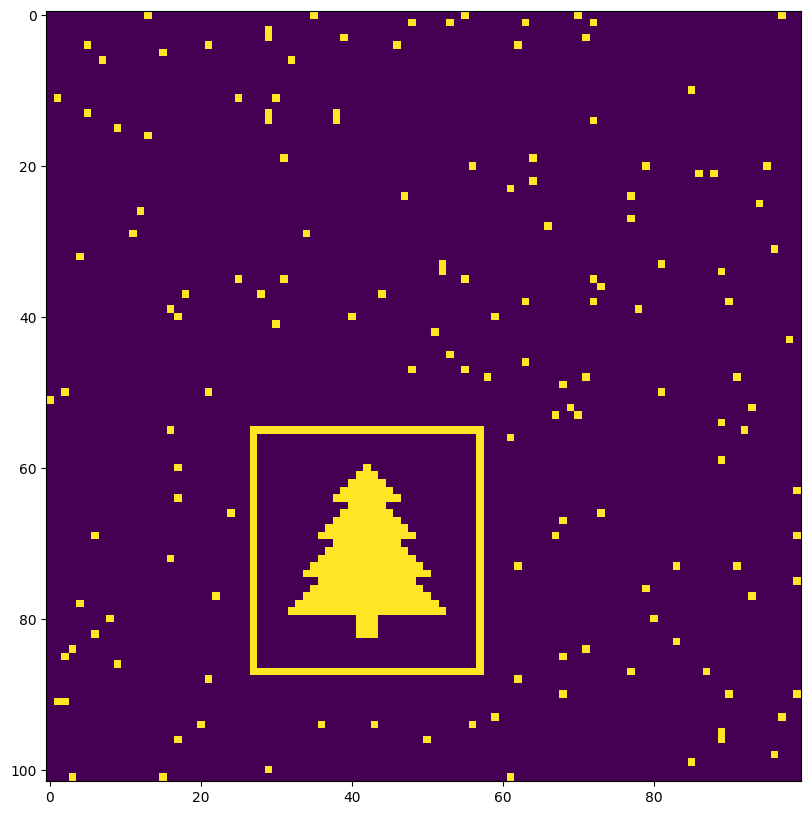

In [189]:
f = plt.figure(figsize=(10,10))
#vals,arrx,arry,f = plt.hist2d(robots1.T[0],robots1.T[1],bins=(xlim-1,xlim+1),origin='lower')
vals,arrx,arry = np.histogram2d(robots1.T[0],robots1.T[1],bins=(xlim-1,xlim+1))
plt.imshow(vals.T)

#plt.show()